# K-fold cross-validation

Using scikit-learn

In [37]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

from new.functions import runge, OLS_parameters, MSE, Ridge_parameters

# from sklearn.linear_model import Ridge


In [ ]:
# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

maxdegree = 10
degrees = range(1,maxdegree+1)

# initialising kfolds
k = 5
kfold = KFold(n_splits= k)

scores_kfold = np.zeros((maxdegree,k))


# looping over polynomial degrees
for p in degrees:

    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    j = 0 
    for train_inds, test_inds in kfold.split(x):
        x_train = x[train_inds]
        y_train = y[train_inds]

        x_test = x[test_inds]
        y_test = y[test_inds]

        X_train = poly.fit_transform(x_train)
        # OLS
        beta = OLS_parameters(X_train, y_train)
        y_train_tilde = X_train @ beta + y_train.mean()

        X_test = poly.fit_transform(x_test)
        y_pred = X_test @ beta + y_train.mean()
        scores_kfold[p-1,j] = MSE(y_test, y_pred)
        j += 1

estimated_mse_kfold = np.mean(scores_kfold, axis = 1)



[[0.16794519 0.16883492 0.15489018 0.18964958 0.16240821]
 [0.13559885 0.11103947 0.11079782 0.14403032 0.11766691]
 [0.13542572 0.11113465 0.11079477 0.14438751 0.1181422 ]
 [0.11553666 0.09318211 0.09647807 0.11493316 0.09260383]
 [0.11585214 0.09324806 0.09651563 0.11515577 0.09255395]
 [0.10247623 0.08796408 0.08980691 0.10349917 0.08087795]
 [0.10244275 0.08802482 0.09012135 0.10350304 0.08105272]
 [0.09122418 0.08860391 0.08406966 0.09757695 0.0809209 ]
 [0.09067716 0.08898003 0.08407687 0.09767458 0.08091864]
 [0.08838775 0.08492401 0.08121292 0.09660339 0.08234058]]


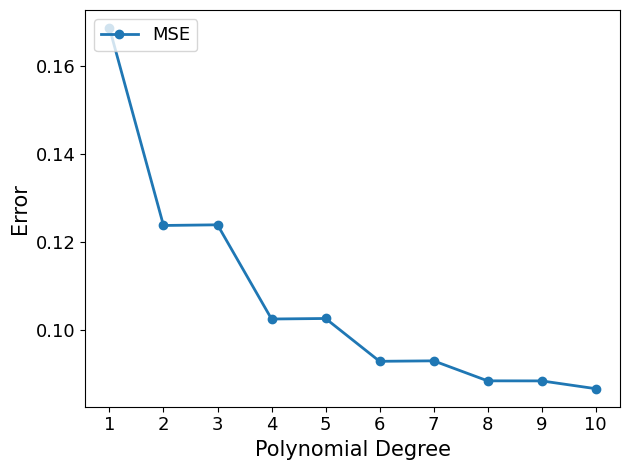

In [16]:
# plotting
plt.plot(degrees,estimated_mse_kfold, label='MSE', marker='o', linewidth=2)

plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("../Figures/kfold_k5_pmax10.png", dpi=300, bbox_inches='tight')
plt.show()

Heatmap of mse for kfolds with polynomial degree and folds. 

In [ ]:
# 

mses = np.zeros((5,5))

ks = range(2,7)
maxdegree = 9
degrees = range(5,maxdegree+1)

# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)


for i in ks:
    kfold = KFold(n_splits= i)

    scores_kfold = np.zeros((5,i))
    for p in degrees:
            poly = PolynomialFeatures(degree=p)
            scaler = StandardScaler()
            j = 0 
            for train_inds, test_inds in kfold.split(x):
                x_train = x[train_inds]
                y_train = y[train_inds]

                x_test = x[test_inds]
                y_test = y[test_inds]

                X_train = poly.fit_transform(x_train)

                # OLS
                beta = OLS_parameters(X_train, y_train)
                y_train_tilde = X_train @ beta + y_train.mean()

                X_test = poly.fit_transform(x_test)
                y_pred = X_test @ beta + y_train.mean()

                scores_kfold[p-5,j] = MSE(y_test, y_pred)
                j += 1
    mses[i-2,:] = np.mean(scores_kfold, axis = 1)




[[0.10311374 0.0929906  0.09303235 0.08903134 0.08887552]
 [0.10248832 0.09253591 0.09251669 0.08838404 0.08847567]
 [0.10260363 0.09277061 0.09279926 0.08851776 0.0885824 ]
 [0.10266511 0.09292487 0.09302894 0.08847912 0.08846546]
 [0.10279551 0.09291742 0.0929812  0.08856366 0.08857301]]


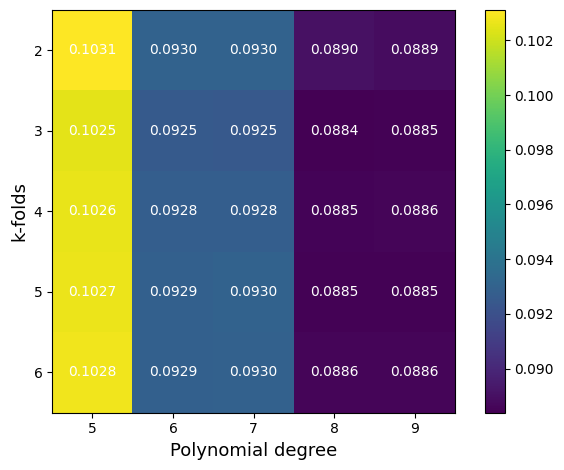

In [36]:
fig, ax = plt.subplots()
im = ax.imshow(mses)
ax.set_xticks(range(len(degrees)), labels=degrees)
ax.set_yticks(range(len(ks)), labels=ks)

for i in ks:
    for j in degrees:
        text = ax.text(j-5, i-2, "{:.4f}".format(mses[i-2,j-5]), ha='center', va='center', color='w')

# ax.set_title('MSE of cross validation')
ax.set_xlabel('Polynomial degree', fontsize=13)
ax.set_ylabel('k-folds', fontsize=13)

fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.savefig("../Figures/kfold_hetamap.png", dpi=300, bbox_inches='tight')
plt.show()


In [40]:
# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

maxdegree = 10
degrees = range(1,maxdegree+1)

# initialising kfolds
k = 5
kfold = KFold(n_splits= k)

scores_kfold_ridge = np.zeros((maxdegree,k))


# looping over polynomial degrees
for p in degrees:

    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    j = 0 
    for train_inds, test_inds in kfold.split(x):
        x_train = x[train_inds]
        y_train = y[train_inds]

        x_test = x[test_inds]
        y_test = y[test_inds]

        X_train = poly.fit_transform(x_train)
        # OLS
        beta = Ridge_parameters(X_train, y_train, 0.0001)
        y_train_tilde = X_train @ beta + y_train.mean()

        X_test = poly.fit_transform(x_test)
        y_pred = X_test @ beta + y_train.mean()
        scores_kfold[p-1,j] = MSE(y_test, y_pred)
        j += 1

estimated_mse_kfold_ridge = np.mean(scores_kfold, axis = 1)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
# plotting
plt.plot(degrees,estimated_mse_kfold, label='MSE', marker='o', linewidth=2)
plt.plot(degrees,estimated_mse_kfold_ridge, label='MSE', marker='o', linewidth=2)

plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("../Figures/kfold_k5_pmax10.png", dpi=300, bbox_inches='tight')
plt.show()